<a href="https://colab.research.google.com/github/Kyeong-Ah/test333/blob/kka/%EC%9D%B8%EA%B5%AC%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
from IPython.core.pylabtools import figsize
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [3]:
# # Arima
# # 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/행정구별_인구수.csv', encoding='cp949')
populJR = pd.DataFrame()
yymm = []
yymm = pd.date_range("2011-01", "2022-01", freq="M")
populJR['ymd'] = yymm
populJR['popul'] = data['종로구']
populJR['popul'][131] = populJR['popul'][130]
timeSeries = populJR.loc[:, ['ymd', 'popul']]
# timeSeries.index = timeSeries.ymd
timeSeries.drop('ymd', axis=1)
timeSeries = timeSeries.set_index('ymd')
print(timeSeries.head(5))
ts = timeSeries
print(ts)
print(ts.info())


               popul
ymd                 
2011-01-31  170577.0
2011-02-28  170617.0
2011-03-31  170099.0
2011-04-30  169855.0
2011-05-31  169648.0
               popul
ymd                 
2011-01-31  170577.0
2011-02-28  170617.0
2011-03-31  170099.0
2011-04-30  169855.0
2011-05-31  169648.0
...              ...
2021-08-31  145551.0
2021-09-30  145512.0
2021-10-31  145346.0
2021-11-30  145073.0
2021-12-31  145073.0

[132 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2011-01-31 to 2021-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   popul   132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB
None


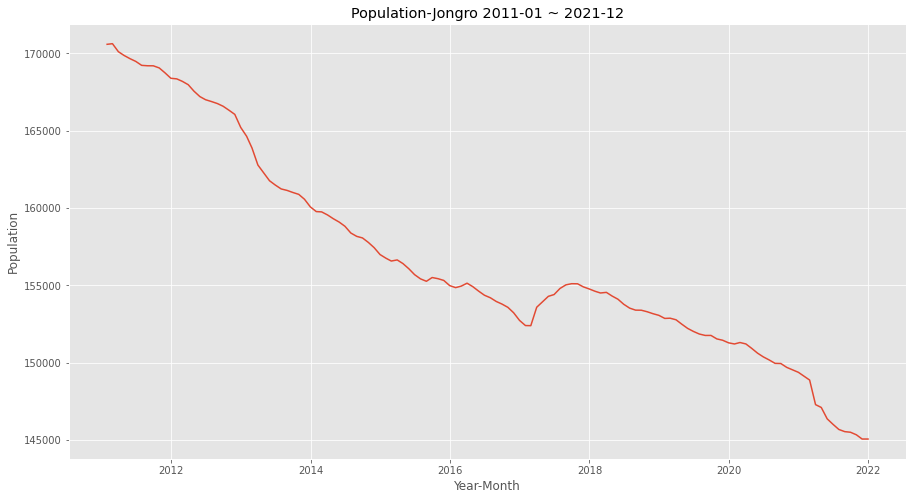

In [4]:
# # 2011-01부터 2021-12 까지 종로구 인구수 그래프
plt.figure(figsize=(15, 8))
plt.plot(ts)
plt.title("Population-Jongro 2011-01 ~ 2021-12")
plt.xlabel("Year-Month")
plt.ylabel("Population")
plt.show()


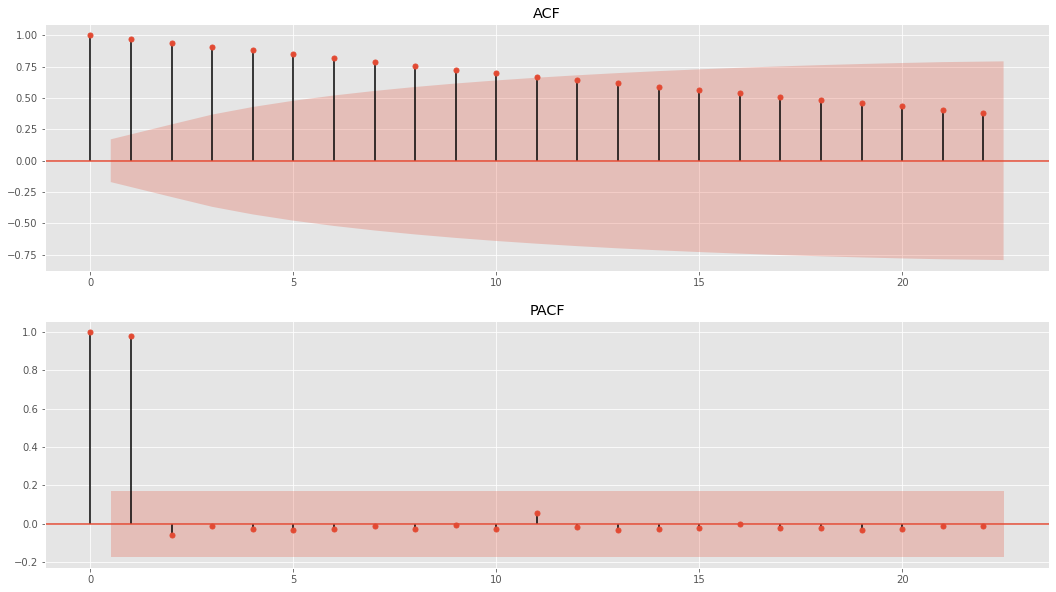

In [5]:
# # ACF, PACF 그래프
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig = plot_acf(ts, ax = ax1)
ax1.set_title("ACF")
fig = plot_pacf(ts, ax = ax2)
ax2.set_title("PACF")
plt.show()


<Figure size 432x288 with 0 Axes>

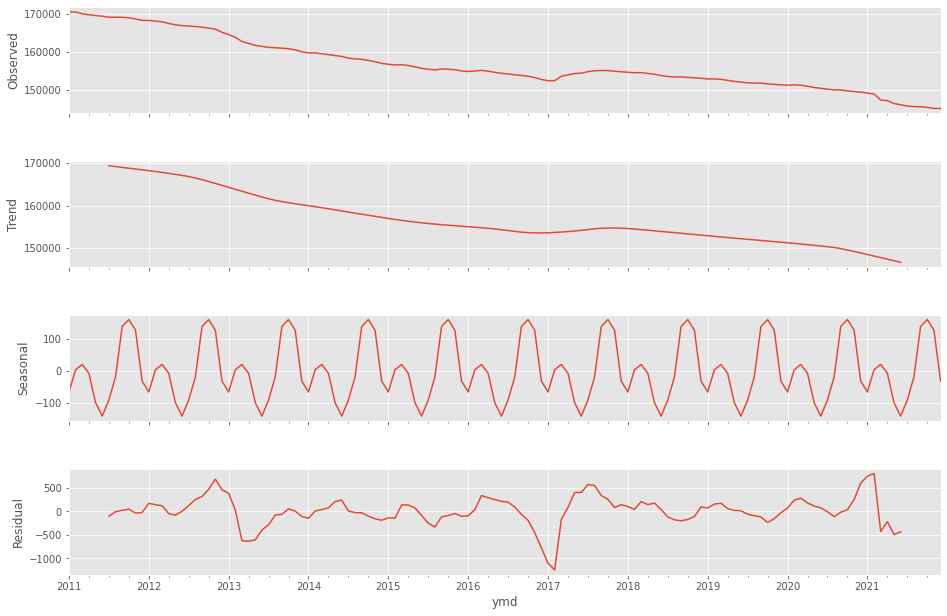

In [6]:
# # seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['popul'], model='additive')
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)
plt.show()


In [7]:
# # 정상성 확인 : ADF(Augmented Dickey-Fuller test)
# # 귀무가설 : 자료가 정상성을 만족하지 않는다. / 대립가설 : 자료가 정상성을 만족한다.

''' 콜랩에서 adfuller가 임포트가 안 되서... 이건 보류. '''

# from statsmodels.tsa.stattools import adfuller
# result1 = adfuller(ts)
# print('ADF Statistic : %f'% result1[0])
# print('p-value : %f'% result1[1])
# print('Critical Values : ')
# for key, value in result1[4].items():
#     print('\t%s: %.3f'%(key, value))
# ''' ADF Statistic : 3.745713
#     p-value : 1.000000
#     Critical Values : 
#         1%: -3.487
#         5%: -2.886
#         10%: -2.580            '''

# # 1차 차분
# ts_diff = ts - ts.shift()
# print(ts_diff)

# # 1차 차분 데이터로 다시 정상성 검사
# from statsmodels.tsa.stattools import adfuller
# result2 = adfuller(ts_diff[1:])
# print(result2)
# print('\n1차 차분 후')
# print('ADF Statistic : %f'% result2[0])
# print('p-value : %f'% resul2t[1])
# print('Critical Values : ')
# for key, value in result2[4].items():
#     print('\t%s: %.3f'%(key, value))

' 콜랩에서 adfuller가 임포트가 안 되서... 이건 보류. '

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


           ymd     popul
120 2021-01-31  149125.0
121 2021-02-28  148884.0
122 2021-03-31  147296.0
123 2021-04-30  147113.0
124 2021-05-31  146377.0
125 2021-06-30  146029.0
126 2021-07-31  145692.0
127 2021-08-31  145551.0
128 2021-09-30  145512.0
129 2021-10-31  145346.0
130 2021-11-30  145073.0
131 2021-12-31  145073.0
2021-01-31    149192.577892
2021-02-28    148911.494655
2021-03-31    148682.385179
2021-04-30    146691.276000
2021-05-31    147044.644011
2021-06-30    145985.487555
2021-07-31    145848.449138
2021-08-31    145452.131372
2021-09-30    145386.870317
2021-10-31    145355.660549
2021-11-30    145149.675592
2021-12-31    144856.795860
Freq: M, dtype: float64


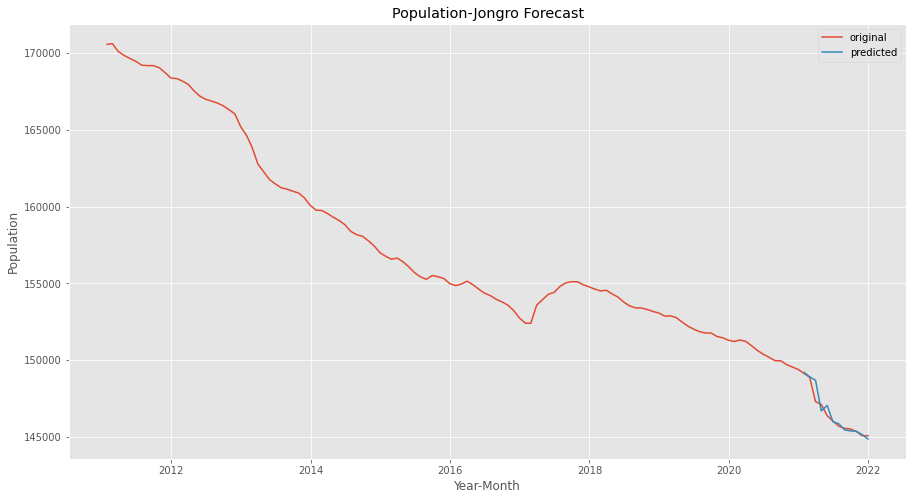

                             ARIMA Model Results                              
Dep. Variable:                D.popul   No. Observations:                  131
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -909.839
Method:                       css-mle   S.D. of innovations            251.148
Date:                Wed, 08 Jun 2022   AIC                           1825.677
Time:                        01:14:30   BIC                           1834.303
Sample:                    02-28-2011   HQIC                          1829.182
                         - 12-31-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -193.4586     28.404     -6.811      0.000    -249.130    -137.787
ma.L1.D.popul     0.2966      0.066      4.525      0.000       0.168       0.425
                                    Root

In [8]:
# # ARIMA 모델 만들기
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(ts, order=(0, 1, 1))
model_fit = model.fit()
# predict
start_index = populJR['ymd'][120] # 2021-01-31 00:00:00
end_index = populJR['ymd'][131]   # 2021-12-31 00:00:00
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')
# # 확인
print(populJR[120:])
print(forecast)

# 시각화
plt.figure(figsize=(15, 8))
plt.plot(populJR.ymd, populJR['popul'], label="original")
plt.plot(forecast, label='predicted')
plt.title("Population-Jongro Forecast")
plt.xlabel("Year-Month")
plt.ylabel("Population")
plt.legend()
plt.show()

print(model_fit.summary())


In [9]:
# # 성능 확인
from sklearn import metrics

def score_check(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    #     mae = round(metrices.mean_absolute_error(y_true, y_pred),3)
    corr = round(np.corrcoef(y_true, y_pred)[0, 1], 3)
    mape = round(
        metrics.mean_absolute_percentage_error(y_true, y_pred) * 100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)
    
    df = pd.DataFrame({
        'R2':r2,
        'Corr':corr,
        'RMSE':rmse,
        'MAPE':mape
    },
                    index=[0])
    return df

score_check(np.array(populJR[populJR.ymd>=start_index]['popul']), np.array(forecast))


,R2,Corr,RMSE,MAPE
0,87.753,0.955,470.417,0.187


In [10]:
fore = model_fit.forecast(steps=12)
print('예측', fore)
'''   ※ stderr
array([144943.67740534, 144750.21875869, 144556.76011204, 144363.30146538,
       144169.84281873, 143976.38417207, 143782.92552542, 143589.46687877,
       143396.00823211, 143202.54958546, 143009.0909388 , 142815.63229215]),
       ※ upper bound
array([ 251.14807939,  411.24609233,  524.5677641 ,  617.42961526,
        698.04535703,  770.26963536,  836.27944004,  897.44709733,
        954.70376724, 1008.7156556 , 1059.97889815, 1108.87476984]),
       ※ lower bound
array([[144451.43621495, 145435.91859574],
       [143944.19122894, 145556.24628844],
       [143528.62618695, 145584.89403712],
       [143153.16165648, 145573.44127429],
       [142801.69905936, 145537.98657809],
       [142466.68342839, 145486.08491576],
       [142143.84794194, 145422.0031089 ],
       [141830.50288998, 145348.43086755],
       [141524.82323243, 145267.1932318 ],
       [141225.50322985, 145179.59594107],
       [140931.57047406, 145086.61140355],
       [140642.27767989, 144988.98690441]])
'''


예측 (array([144943.67740534, 144750.21875869, 144556.76011204, 144363.30146538,
       144169.84281873, 143976.38417207, 143782.92552542, 143589.46687877,
       143396.00823211, 143202.54958546, 143009.0909388 , 142815.63229215]), array([ 251.14807939,  411.24609233,  524.5677641 ,  617.42961526,
        698.04535703,  770.26963536,  836.27944004,  897.44709733,
        954.70376724, 1008.7156556 , 1059.97889815, 1108.87476984]), array([[144451.43621495, 145435.91859574],
       [143944.19122894, 145556.24628844],
       [143528.62618695, 145584.89403712],
       [143153.16165648, 145573.44127429],
       [142801.69905936, 145537.98657809],
       [142466.68342839, 145486.08491576],
       [142143.84794194, 145422.0031089 ],
       [141830.50288998, 145348.43086755],
       [141524.82323243, 145267.1932318 ],
       [141225.50322985, 145179.59594107],
       [140931.57047406, 145086.61140355],
       [140642.27767989, 144988.98690441]]))


'   ※ stderr\narray([144943.67740534, 144750.21875869, 144556.76011204, 144363.30146538,\n       144169.84281873, 143976.38417207, 143782.92552542, 143589.46687877,\n       143396.00823211, 143202.54958546, 143009.0909388 , 142815.63229215]),\n       ※ upper bound\narray([ 251.14807939,  411.24609233,  524.5677641 ,  617.42961526,\n        698.04535703,  770.26963536,  836.27944004,  897.44709733,\n        954.70376724, 1008.7156556 , 1059.97889815, 1108.87476984]),\n       ※ lower bound\narray([[144451.43621495, 145435.91859574],\n       [143944.19122894, 145556.24628844],\n       [143528.62618695, 145584.89403712],\n       [143153.16165648, 145573.44127429],\n       [142801.69905936, 145537.98657809],\n       [142466.68342839, 145486.08491576],\n       [142143.84794194, 145422.0031089 ],\n       [141830.50288998, 145348.43086755],\n       [141524.82323243, 145267.1932318 ],\n       [141225.50322985, 145179.59594107],\n       [140931.57047406, 145086.61140355],\n       [140642.2776798